In [ ]:
!pip install numpy pandas matplotlib tensorflow yfinance


[*********************100%%**********************]  1 of 1 completed
Epoch 1/50
69/69 [==============================] - 3s 10ms/step - loss: 0.0062
Epoch 2/50
69/69 [==============================] - 1s 10ms/step - loss: 3.2743e-05
Epoch 3/50
69/69 [==============================] - 1s 9ms/step - loss: 3.0438e-05
Epoch 4/50
69/69 [==============================] - 1s 10ms/step - loss: 3.1122e-05
Epoch 5/50
69/69 [==============================] - 0s 7ms/step - loss: 2.8007e-05
Epoch 6/50
69/69 [==============================] - 0s 7ms/step - loss: 2.7194e-05
Epoch 7/50
69/69 [==============================] - 0s 6ms/step - loss: 2.8088e-05
Epoch 8/50
69/69 [==============================] - 0s 6ms/step - loss: 2.7917e-05
Epoch 9/50
69/69 [==============================] - 0s 6ms/step - loss: 2.7696e-05
Epoch 10/50
69/69 [==============================] - 0s 6ms/step - loss: 2.8085e-05
Epoch 11/50
69/69 [==============================] - 0s 6ms/step - loss: 2.8882e-05
Epoch 12/50
69/69

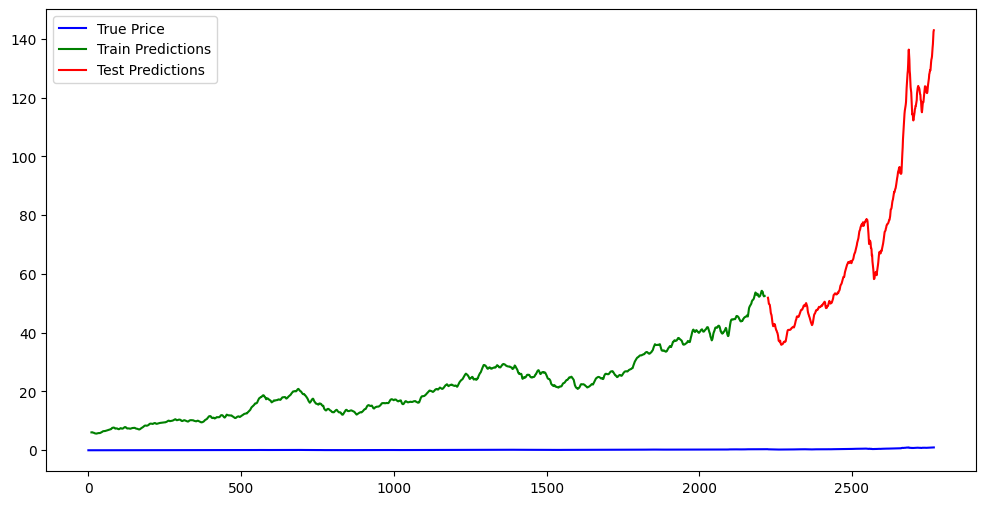

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Download historical stock price data
ticker_symbol = "AAPL"  # You can change this to the symbol of the company you want
start_date = "2010-01-01"
end_date = "2021-01-01"

data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Preprocess the data
data = data['Adj Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Create sequences for training
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 10  # You can adjust this parameter
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Train Loss: {train_loss:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform the predictions
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data, label='True Price', color='b')
plt.plot(range(sequence_length, train_size), train_predictions, label='Train Predictions', color='g')
plt.plot(range(train_size + sequence_length, len(data)), test_predictions, label='Test Predictions', color='r')
plt.legend()
plt.show()
